In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import *
import random as rd
import math

In [122]:
# 다각형의 점 만들기(랜덤범위1, 랜덤범위2, 점 개수)

def making_pts(r1, r2, n):
    pts = []
    while len(pts) < n:
        x, y = rd.randint(r1, r2), rd.randint(r1, r2)
        if (x, y) not in pts:
            pts.append((x, y))
    return pts

In [123]:
# 각도 계산(두 점)

import math

def calculating_Angle(pt1, pt2):
    dx, dy = (pt2[0] - pt1[0]), (pt2[1] - pt1[1])
    if dx >= 0 and dy == 0:
        angle = 0
    else:
        angle = math.atan2(dy, dx) * 180 / math.pi
    return angle

In [124]:
# 단순 다각형 만들기(포인트 리스트)
# 단순 다각형은 연속한 두 변 이외에는 어느 두 변도 교차하지 않는 다각형
# 여러 개의 점을 입력 받은 다음 단순 다각형을 만들어서 출력하는 프로그램 구현

# 가장 낮은 y좌표를 가지는 기준점을 잡는다 (y좌표 동일한 경우 x 좌표까지(가장 낮은값) 계산)
# 기준점에서 출발하는 x축 반 직선을 그린다
# 기준선과 각 점들의 각도를 계산한다
# 낮은 각도부터 순서대로 연결한다

def making_Polygon(pts):
    angle_list = []
    result = [0 for _ in range(len(pts))]
    pts = sorted(pts, key=lambda x: (x[1], x[0]))
    standard_pt = pts[0]
    for pt in pts[1:]:
        angle_of_pt = calculating_Angle(standard_pt, pt)
        angle_list.append([angle_of_pt, pt])
    angle_list = sorted(angle_list, key = lambda x: (x[0], x[1][0], -x[1][1]))
    result[0] = standard_pt
    for idx, i in enumerate(angle_list):
        result[idx+1] = i[1]
    return result

In [125]:
# 다각형의 면적 구하기(포인트 리스트)
# 공식
# A(area) = 1/2(i=0, n-1)sigma (xi yi+1 - xi+1 yi)
# 첫 점이 마지막 점으로 오는 닫힌 폴리곤 리스트
# 시계방향 혹은 반시계방향으로 정렬된 리스트
# ex) [(0,0), (0,10), (10,10), (10,0), (0,0)]

def area_Polygon(pts):
    poly_area = 0
    for i in range(len(pts)-1):
        poly_area += (pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1])
    return abs(poly_area) / 2

In [126]:
# 다각형의 무게중심 구하기(포인트 리스트)
# 공식
# Centroid_x = 1/6A (i=0, n-1)sigma (xi * xi+1) (xi yi+1 - xi+1 yi)
# Centroid_y = 1/6A (i=0, n-1)sigma (yi * yi+1) (xi yi+1 - xi+1 yi)
# A(area) = 1/2(i=0, n-1)sigma (xi yi+1 - xi+1 yi)

def centroid_Polygon(pts):
    A = area_Polygon(pts)
    x = 0
    y = 0
    for i in range(len(pts)-1):
        x += (pts[i][0] + pts[i+1][0]) * ((pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1]))
        y += (pts[i][1] + pts[i+1][1]) * ((pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1]))
    centroid_x = 1/6 / A * x 
    centroid_y = 1/6 / A * y
    return [centroid_x, centroid_y]

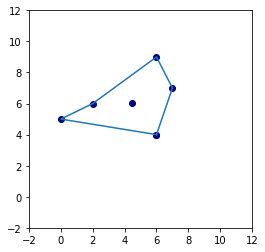

랜덤으로 생성한 Points : [(2, 6), (7, 7), (0, 5), (6, 9), (6, 4)]
Polygon 생성을 위해 정렬 조정한 Points : [(6, 4), (7, 7), (6, 9), (2, 6), (0, 5), (6, 4)]
구현함수 면적산출 결과 : 16.5
내부함수 면적산출 결과 : 16.5
무게중심 점 좌표 : [4.434343434343434, 6.06060606060606]


In [127]:
pts_1 = making_pts(0, 10, 5)
pts_2 = making_Polygon(pts_1)
polygon = Polygon(pts_2)
pts_3 = pts_2
pts_3.append(pts_2[0])
polygon_area1 = area_Polygon(pts_2)
polygon_area2 = polygon.area
centroid_polygon = centroid_Polygon(pts_3)
centroid_pt = Point(centroid_polygon)

fig = plt.figure(figsize=(4, 4))
for pt in pts_2:
    p = Point(pt)
    plt.scatter(p.x, p.y, color='navy')
plt.xlim(-2, 12)
plt.ylim(-2, 12)
plt.plot(*polygon.exterior.xy)
plt.scatter(centroid_pt.x, centroid_pt.y, color='navy')
plt.show()
print(f'랜덤으로 생성한 Points : {pts_1}')
print(f'Polygon 생성을 위해 정렬 조정한 Points : {pts_2}')
print(f'구현함수 면적산출 결과 : {polygon_area1}')
print(f'내부함수 면적산출 결과 : {polygon_area2}')
print(f'무게중심 점 좌표 : {centroid_polygon}')